# **Saudi Arabia Used Cars** <br> <hr>
### Created by: Yeremia Immanuel Sihombing

> ## **Contents**

1. Business Problem Understanding
1. Data Understanding
1. Data Processing
1. Modeling
1. Conclusion
1. Recommedation

> ## **Business Program Understanding**  <br>

### <br>***Context***
Terdapat 5624 data mobil bekas yang sudah terjual di Saudi arabia. Dataset yang disediakan dilansir dari [syarah.com](https://www.kaggle.com/datasets/turkibintalib/saudi-arabia-used-cars-dataset). Berbagai informasi mengenai mobil bekas yang terdapat dalam dataset terdiri atas `brand name`, `model`, `manufacturing year`, `origin`, `options`, `engine capacity`, `transmission type`, `mileage that the car covered`, `region price`, and `negotiable`.  <br></br>
### <br>***Problem Statement***
Seiring dengan bertambanya penjualan mobil bekas, perlu dilakukan penentuan harga yang terdapat untuk setiap mobil bekas yang akan dijual.<br></br>
### <br>***Objective***
Berdasarkan permasalahan tersebut, diperlukan 'tool' yang dapat menentukan harga yang tepat untuk setiap mobil bekas yang akan dijual.<br></br>
### <br>***Analytic Approach***
Perlu dilakukan analisis untuk menemukan pola dari fitur-fitur yang ada sehingga dapat diketahui karateristik dari setiap fitur. Selanjutnya, akan dibagun suatu model regresi yang dapat memprediksi harga jual mobil bekas.<br></br>
### <br>***Metric Evaluation***
Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. <br>
Selain itu, dapat digunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.<br></br>

> ## **Data Understanding** 

### ***Library dan Dataset Import***

#### Import Library

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Statistik
from scipy.stats import chi2_contingency

# Modelling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [61]:
# Load dataset
df = pd.read_csv('data_saudi_used_cars.csv')

# Copy dataset
df_model = df.copy()

Dataset ini berisi informasi terkait data penjualan mobil bekas di Arab Saudi. <br>
Ada 11 kolom di dalam dataset `data_saudi_used_cars`, yaitu:  <br>
-   Type: Type of used car.
-	Region: The region in which the used car was offered for sale.
-	Make: The company name.
-	Gear_Type: Gear type size of used car.
-	Origin: Origin of used car.
-	Options: Options of used car.
-	Year: Manufacturing year.
-	Engine_Size: The engine size of used car.
-	Mileage: Mileage of used car	
-	Negotiable: True if the price is 0, that means it is negotiable.
-	Price: Used car price.


Berikut merupakan tampilan dari dataset.

In [62]:
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


### ***Exploratory Data Analysis***

#### Attributes Information

In [63]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[NX, 500]"
1,Region,object,0,0.0,27,"[Qurayyat, Al-Jouf]"
2,Make,object,0,0.0,58,"[Mercedes, Rolls-Royce]"
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Unknown, Gulf Arabic]"
5,Options,object,0,0.0,3,"[Standard, Full]"
6,Year,int64,0,0.0,50,"[1993, 1986]"
7,Engine_Size,float64,0,0.0,71,"[3.5, 2.9]"
8,Mileage,int64,0,0.0,1716,"[94283, 115300]"
9,Negotiable,bool,0,0.0,2,"[False, True]"


#### Numerical and Categorical Features DIstribution

In [64]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


In [65]:
df.describe(include='object')

,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


Dari hasl analisis diatas, tidak terdapat anomali pada hasil deskripsi data.

#### Missing Value

In [66]:
df.isna().sum()/df.shape[0]*100

Type           0.0
Region         0.0
Make           0.0
Gear_Type      0.0
Origin         0.0
Options        0.0
Year           0.0
Engine_Size    0.0
Mileage        0.0
Negotiable     0.0
Price          0.0
dtype: float64

Dari hasil analisis diatas, tidak terdapat data hilang di dalam setiap fitur. Maka dari itu, tidak butuhkan pembersihan dataset.

#### Data Correlation

Text(0.5, 1.0, 'Correlation Matrix')

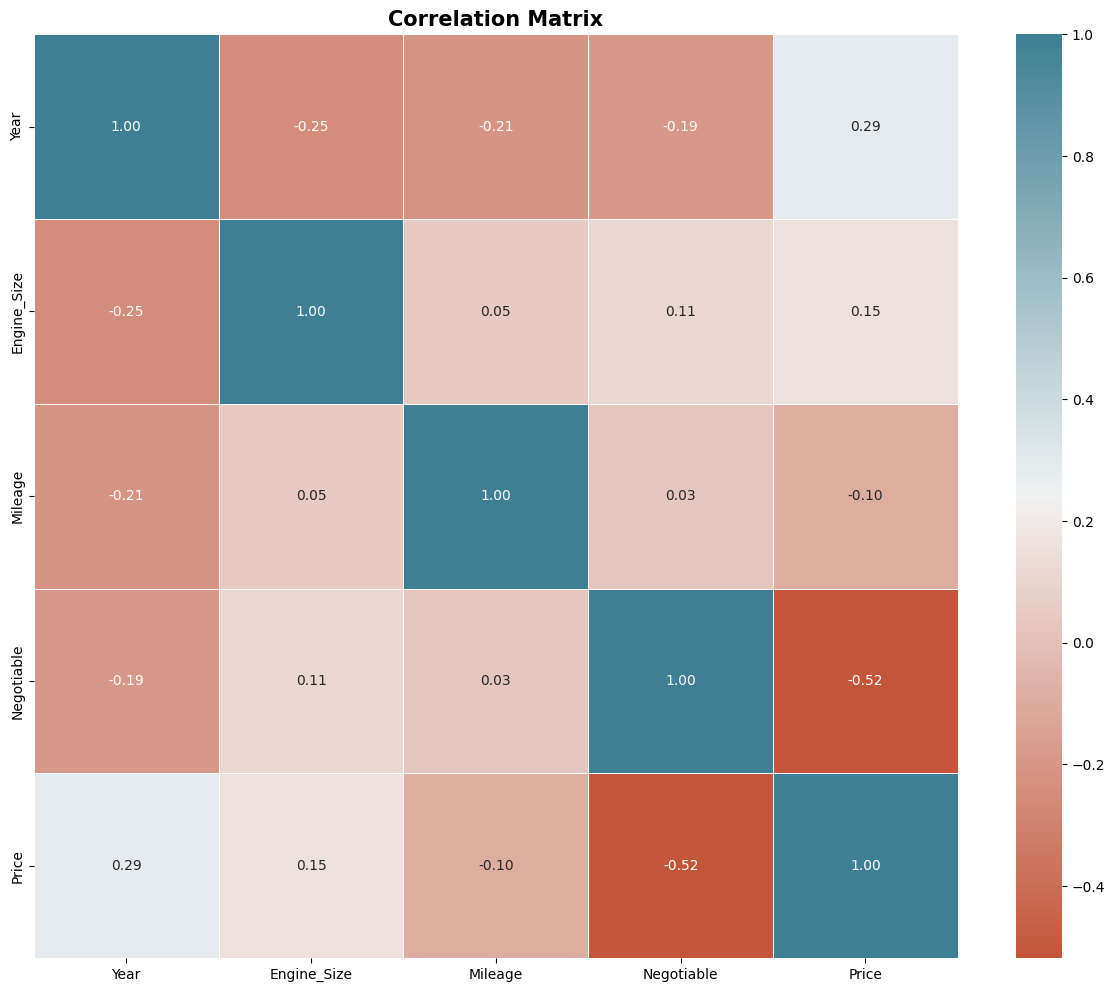

In [67]:
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

*Correlation Matrix* menunjukkan bahwa tidak ada kategori fitur yang memiliki korelasi tinggi antar kategori.

#### Outliers Detection

<AxesSubplot:>

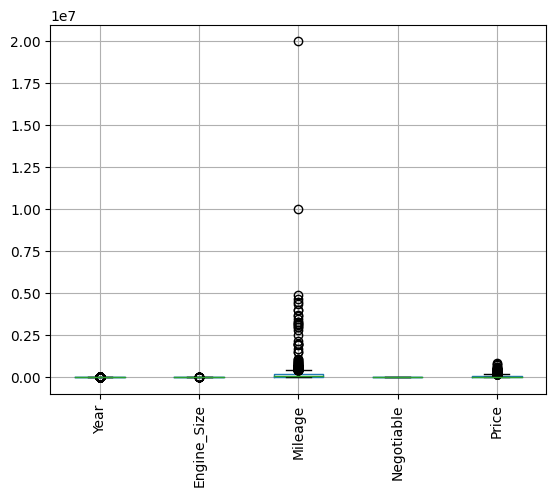

In [68]:
df.boxplot(rot=90)

Dari diagram diatas dapat dilihat bahwa terdapat outliers pada fitur `Mileage` dan `Price`. Perlu dilakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Namun, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja.

Didefinisikan persamaan untuk mendeskripsikan batas outlier pada setiap fitur sebagai berikut.

In [69]:
# Cek Outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')       

### ***Feature Engineering***

#### Target: `Price`

Fitur `Price` dapat dideskripsikan kembali sebagai berikut.

In [70]:
df_model['Price'].describe()

count      5624.000000
mean      53074.058144
std       70155.340614
min           0.000000
25%           0.000000
50%       36500.000000
75%       72932.500000
max      850000.000000
Name: Price, dtype: float64

Pada dataset yang didapatkan perlu diperhatikan bahwa untuk harga dengan dapat dinegoisasikan atau nilai fitur `Negotiable` adalah True, maka nilai `Price` sebesar 0. Oleh karena itu, perlu dilakukan pembersihan data untuk fitur `Price` bernilai 0.

In [71]:
df.count()['Price']

5624

In [72]:
print('Jumlah fitur Price bernilai 0 adalah ', df[df['Price'] == 0].count()['Price'])
print('Persentase fitur Price bernilai 0 adalah ', "{0:.2f}%".format(df[df['Price'] == 0].count()['Price']/df.count()['Price']*100))

Jumlah fitur Price bernilai 0 adalah  1797
Persentase fitur Price bernilai 0 adalah  31.95%


In [73]:
df_model.drop(df_model.index[df_model['Price'] == 0], inplace=True)
df_model.head(10)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False,48000
8,Avalon,Riyadh,Toyota,Automatic,Saudi,Standard,2016,3.5,110864,False,81500
10,C300,Makkah,Chrysler,Automatic,Saudi,Full,2013,5.7,200,False,55000
11,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,2011,4.6,79000,False,145000
12,LS,Dammam,Lexus,Automatic,Saudi,Full,2008,4.6,299000,False,38000


Sebanyak 1797 data atau 31.95% dihapus dari dataset dikarenakan tidak reliable untuk digunakan pada pemodelan.

Anomali pada distribusi fitur `Price` dapat dianalisis sebagai berikut.

In [74]:
find_anomalies(df['Price'])

IQR: 72932.5
limit_bawah: -109398.75
limit_atas: 182331.25


Berikut merupakan plot distribusi pada fitur `Price`. 

Text(0.5, 1.0, 'Price Distribution Plot')

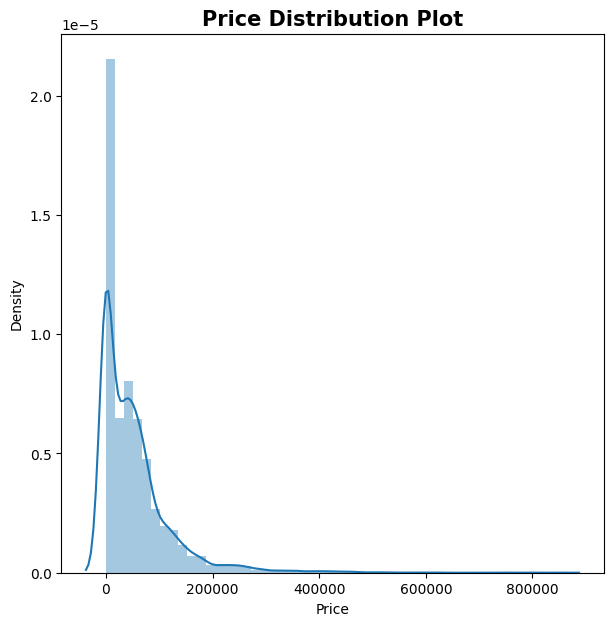

In [75]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['Price'])
plt.title('Price Distribution Plot', size=15, weight='bold')

In [76]:
print('Jumlah outlier pada fitur Price adalah ', df[df['Price'] > 182331].count()['Price'])
print('Persentase outlier pada fitur Price adalah ', "{0:.2f}%".format(df[df['Price'] > 182331].count()['Price']/df.count()['Price']*100))

Jumlah outlier pada fitur Price adalah  261
Persentase outlier pada fitur Price adalah  4.64%


Berdasarkan plot distribusi, harga penjualan mobil bekas di Arab Saudi,terdapat *right-skewed distribution* atau terdapat skewness positif pada fitur price. <br>
Terdapat 4.64% outlier pada fitur `Price` dimana harga berada diatas 182.331. Persentase ini cukup kecil sehingga dapat dihilangkan dari pemodelan sehingga nilai skewness dapat berkurang. Namun, hal ini dapat menjadi limitasi dari model yang dibangun.

In [77]:
df_model = df_model[(df_model['Price'] <= 182500)]

Text(0.5, 0, 'Range Selected Price')

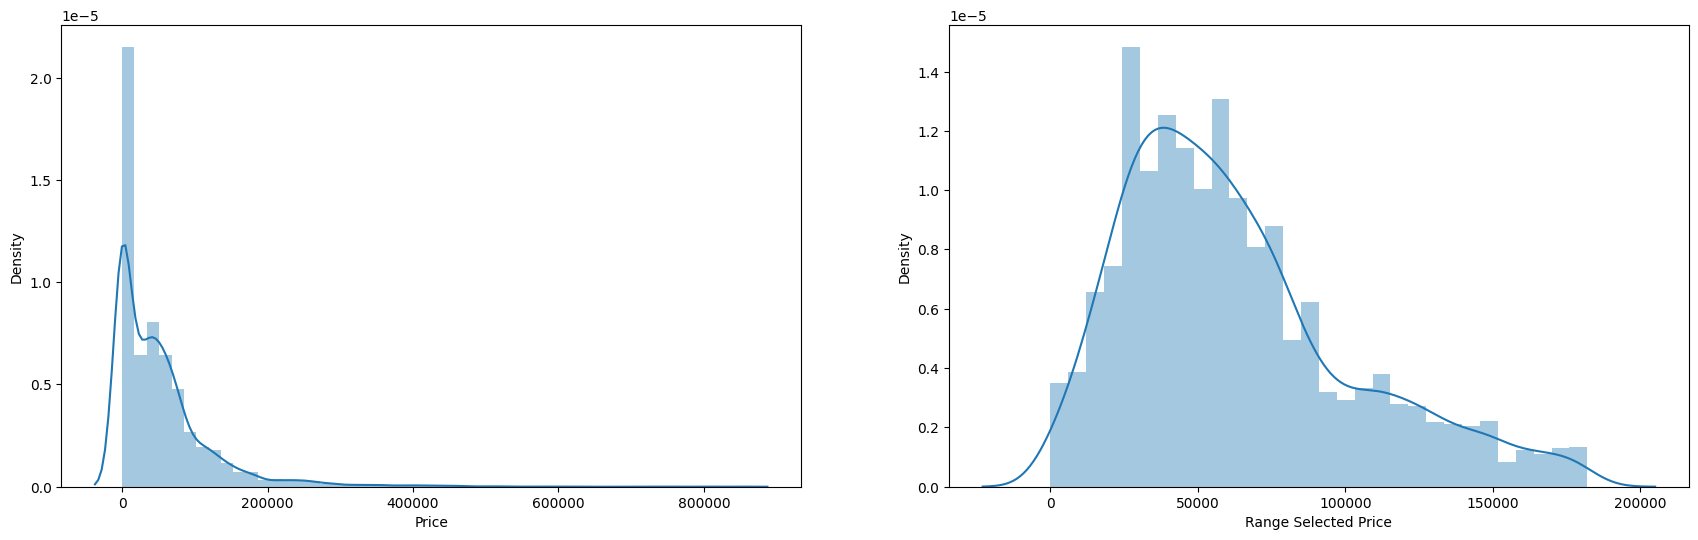

In [78]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Price'], ax=axes[0])
sns.distplot(df_model['Price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price')

In [79]:
df_model['Price'].describe()

count      3566.000000
mean      62855.609366
std       39318.871216
min           1.000000
25%       34850.000000
50%       55000.000000
75%       81500.000000
max      182000.000000
Name: Price, dtype: float64

Hasil pembersihan data pada fitur `Price` telah memberikan distribusi yang lebih baik serta data yang lebih reliable dibandingkan dataset sebelumnya.

#### Feature: `Mileage`

Fitur `Mileage` dapat dideskripsikan kembali sebagai berikut.

In [80]:
df['Mileage'].describe()

count    5.624000e+03
mean     1.509234e+05
std      3.828360e+05
min      1.000000e+02
25%      3.800000e+04
50%      1.030000e+05
75%      1.960000e+05
max      2.000000e+07
Name: Mileage, dtype: float64

Anomali pada distribusi fitur `Mileage` dapat dianalisis sebagai berikut.

In [81]:
find_anomalies(df['Mileage'])

IQR: 158000.0
limit_bawah: -199000.0
limit_atas: 433000.0


Berikut merupakan plot distribusi pada fitur `Mileage`. 

Text(0.5, 1.0, 'Mileage Distribution Plot')

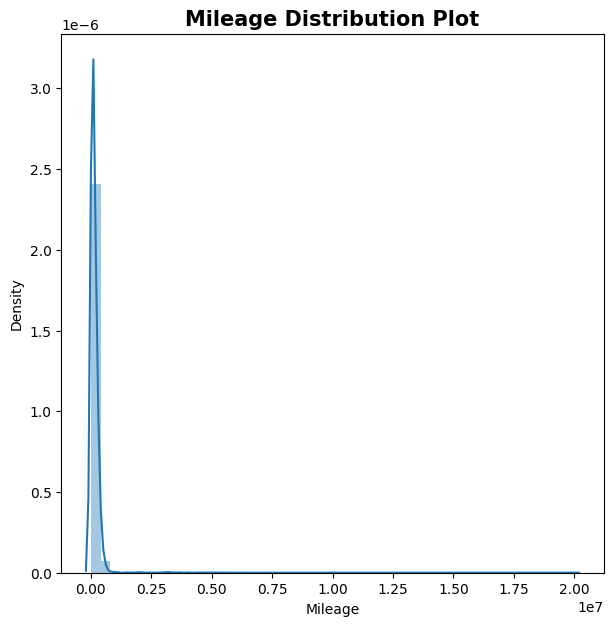

In [82]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['Mileage'])
plt.title('Mileage Distribution Plot', size=15, weight='bold')

In [83]:
print('Jumlah outlier pada fitur Mileage adalah ', df[df['Price'] > 433000].count()['Mileage'])
print('Persentase outlier pada fitur  Mileage adalah ', "{0:.2f}%".format(df[df['Mileage'] > 433000].count()['Mileage']/df.count()['Mileage']*100))

Jumlah outlier pada fitur Mileage adalah  21
Persentase outlier pada fitur  Mileage adalah  3.11%


Berdasarkan plot distribusi, jarak tempuh pada mobil bekas di Arab Saudi,terdapat *right-skewed distribution* atau terdapat skewness positif pada fitur price. <br>
Terdapat 3.11% outlier pada fitur `Mileage` dimana jarak tempuh berada diatas 433.000. Persentase ini cukup kecil sehingga dapat dihilangkan dari pemodelan sehingga nilai skewness dapat berkurang. Namun, hal ini dapat menjadi limitasi dari model yang dibangun.

In [84]:
df_model = df_model[(df_model['Mileage'] <= 433000)]

Text(0.5, 0, 'Range Selected Mileage')

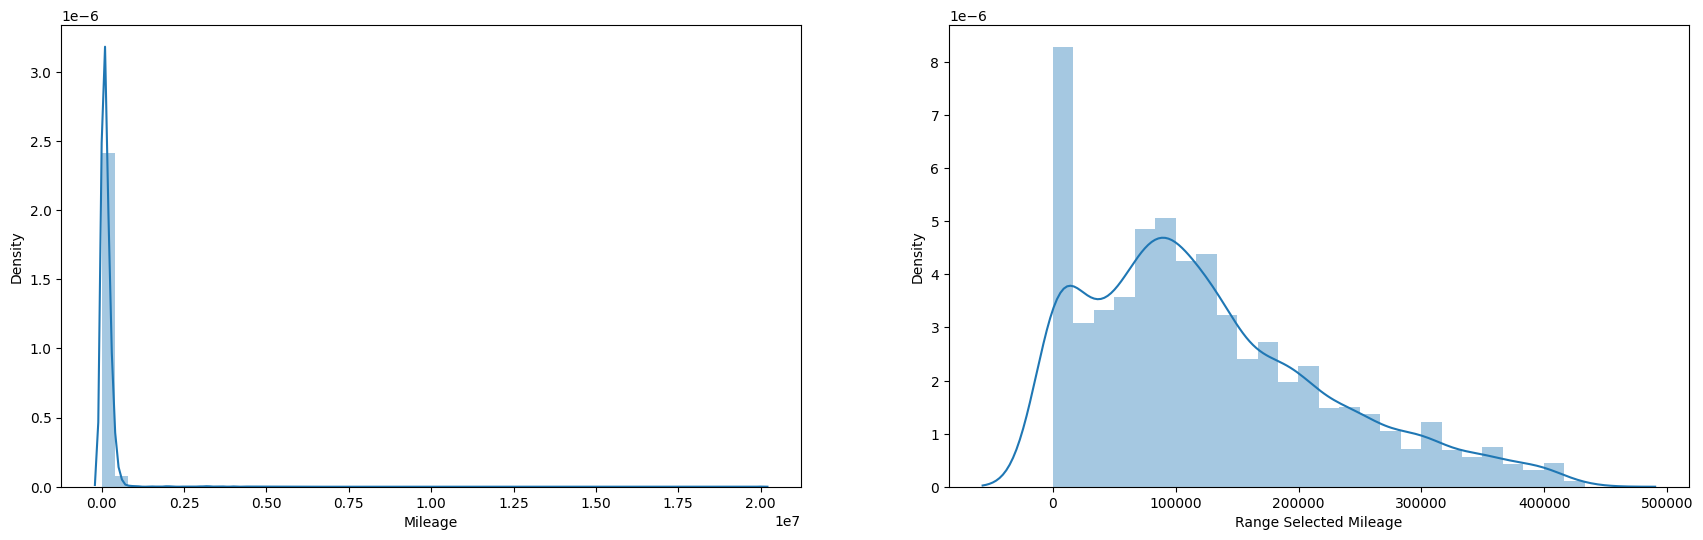

In [85]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Mileage'], ax=axes[0])
sns.distplot(df_model['Mileage'], ax=axes[1])
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Range Selected Mileage')

In [86]:
df_model['Mileage'].describe()

count      3485.000000
mean     125634.739455
std       97641.499411
min         100.000000
25%       52443.000000
50%      106000.000000
75%      183000.000000
max      433000.000000
Name: Mileage, dtype: float64

Hasil pembersihan data pada fitur `Mileage` telah memberikan distribusi yang lebih baik serta data yang lebih reliable dibandingkan dataset sebelumnya.

#### Feature: `Negotiable`

Fitur `Negotiable` tidak dibutuhkan dalam pemodelan karena semua fitur `Price` yang memiliki nilai maka memiliki nilai fitur `Negotiable`sebagai False. Maka dari itu, fitur `Negotiable` akan di-drop dari dataset.

In [87]:
df_model.drop('Negotiable', axis=1, inplace=True)

#### Feature: `Type`

Fitur `Type` dapat dideskripsikan kembali sebagai berikut.

In [88]:
df['Type'].describe()

count             5624
unique             347
top       Land Cruiser
freq               269
Name: Type, dtype: object

Fitur `Type` merupakan jenis mobil yang akan dijual. Fitur ini memiliki terlalu banyak unique value yang sebesar 347 jika dibandingkan banyak data yaitu 5624 data. <br>
Terdapat kemungkinan agar fitur ini dapat diwakilkan oleh fitur `Make` dan `Engine_size` sehingga perlu dilakukan tes independensi menggunakan metode Chi Square.

In [89]:
df_ct = pd.crosstab(df['Type'], df['Make'])
stat, pvalue, dof, expected = chi2_contingency(df_ct)
alpha = 0.05
print('p-value: ', pvalue)
if pvalue <= alpha:
    print('Dependent (tolak Ho)')
else:
    print('Independent (terima Ho)')

p-value:  0.0
Dependent (tolak Ho)


In [90]:
df_ct = pd.crosstab(df['Type'], df['Engine_Size'])
stat, pvalue, dof, expected = chi2_contingency(df_ct)
alpha = 0.05
print('p-value: ', pvalue)
if pvalue <= alpha:
    print('Dependent (tolak Ho)')
else:
    print('Independent (terima Ho)')

p-value:  0.0
Dependent (tolak Ho)


Dari hasil perhitungan *chi square* dapat disimpulkan bahwa fitur `Type` memiliki depedensi terhadap fitur `Make` dan `Engine_size`. Maka dari itu fitur `Type` dapat di-drop dari pemodelan.

In [91]:
df_model.drop('Type', axis=1, inplace=True)

#### Feature: `Engine_Size`

In [92]:
df['Engine_Size'].describe()

count    5624.000000
mean        3.295430
std         1.515108
min         1.000000
25%         2.000000
50%         3.000000
75%         4.500000
max         9.000000
Name: Engine_Size, dtype: float64

Anomali pada distribusi fitur `Engine_Size` dapat dianalisis sebagai berikut.

In [93]:
find_anomalies(df['Engine_Size'])

IQR: 2.5
limit_bawah: -1.75
limit_atas: 8.25


Berikut merupakan plot distribusi pada fitur `Engine_Size`. 

Text(0.5, 1.0, 'Engine_Size Distribution Plot')

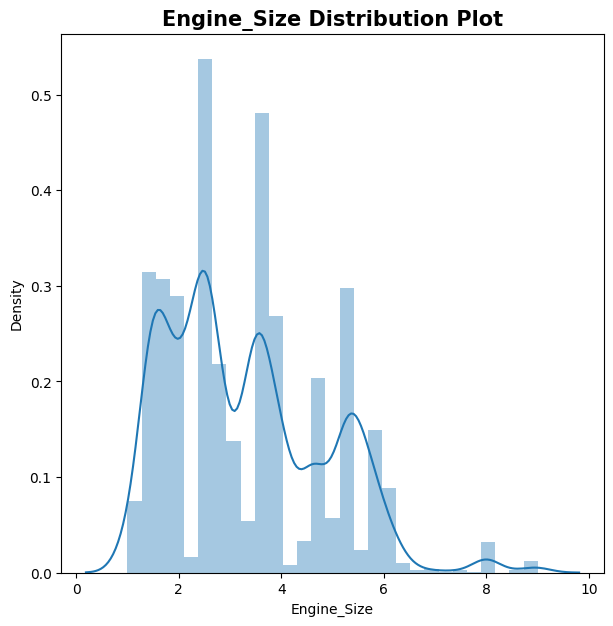

In [94]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['Engine_Size'])
plt.title('Engine_Size Distribution Plot', size=15, weight='bold')

Tidak terdapat  anomali pada fitur `Engine_Size`

#### Feature: `Year`

In [95]:
df['Year'].describe()

count    5624.000000
mean     2014.101885
std         5.791606
min      1963.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2022.000000
Name: Year, dtype: float64

Anomali pada distribusi fitur `Year` dapat dianalisis sebagai berikut.

In [96]:
find_anomalies(df['Year'])

IQR: 6.0
limit_bawah: 2003.0
limit_atas: 2027.0


Berikut merupakan plot distribusi pada fitur `Year`. 

Text(0.5, 1.0, 'Year Distribution Plot')

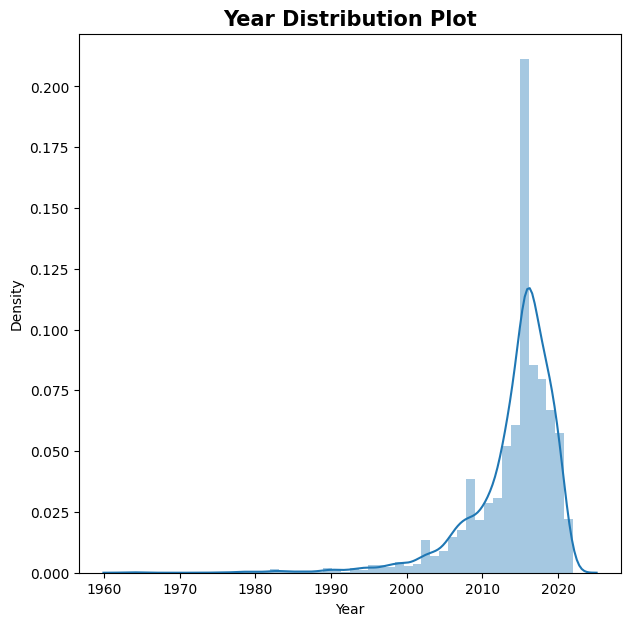

In [97]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['Year'])
plt.title('Year Distribution Plot', size=15, weight='bold')

In [98]:
print('Jumlah outlier pada fitur Year adalah ', df[df['Year'] < 2003].count()['Year'])
print('Persentase outlier pada fitur  Year adalah ', "{0:.2f}%".format(df[df['Year'] < 2003].count()['Year']/df.count()['Year']*100))

Jumlah outlier pada fitur Year adalah  246
Persentase outlier pada fitur  Year adalah  4.37%


Berdasarkan plot distribusi, jarak tempuh pada mobil bekas di Arab Saudi,terdapat *left-skewed distribution* atau terdapat skewness negatif pada fitur `Year`. <br>
Terdapat 4.37% outlier pada fitur `Year` dimana tahun kelauran mobil berada dibawah tahun 2003. Persentase ini cukup kecil sehingga dapat dihilangkan dari pemodelan sehingga nilai skewness dapat berkurang. Namun, hal ini dapat menjadi limitasi dari model yang dibangun.

In [99]:
df_model = df_model[(df_model['Year'] >= 2003)]

Text(0.5, 0, 'Range Selected Year')

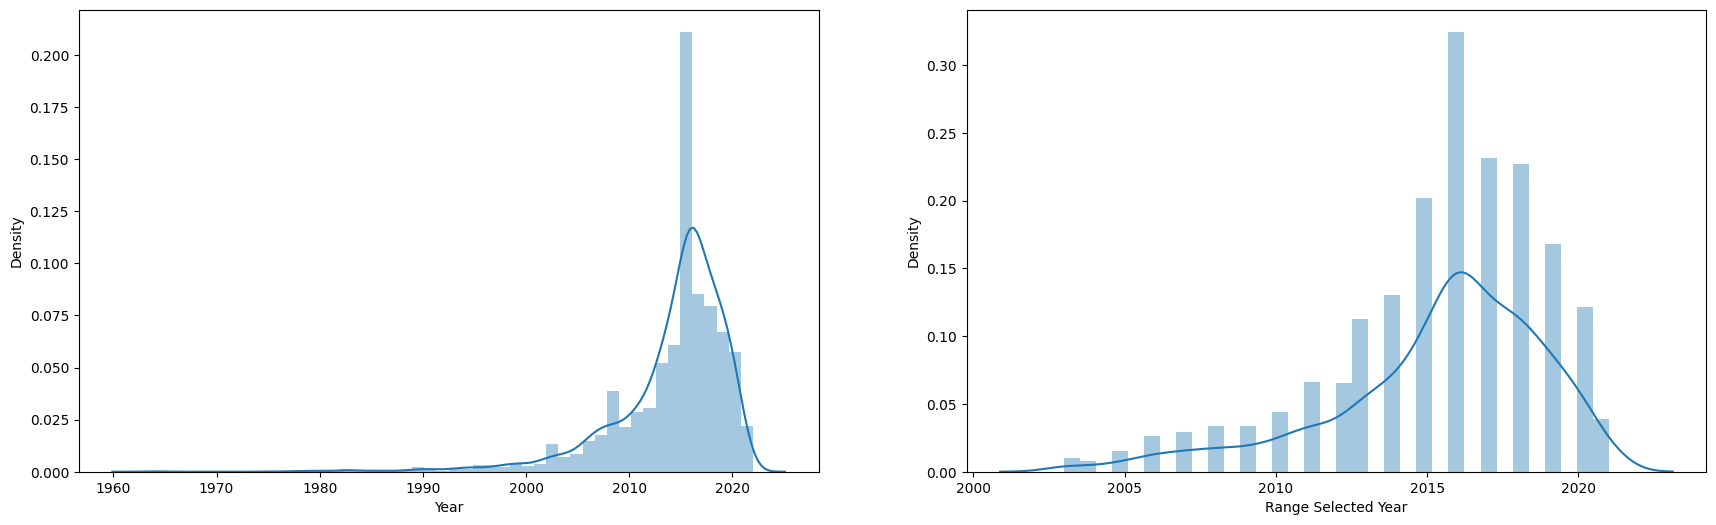

In [100]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Year'], ax=axes[0])
sns.distplot(df_model['Year'], ax=axes[1])
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Range Selected Year')

In [101]:
df_model['Year'].describe()

count    3392.000000
mean     2015.358785
std         3.586910
min      2003.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: Year, dtype: float64

> ## **Data Processing**  <br>

#### **Attribute Feature**

In [102]:
listItem = []
for col in df_model.columns :
    listItem.append([col, df_model[col].dtype, df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,unique,uniqueSample
0,Region,object,27,"[Sabya, Khobar]"
1,Make,object,53,"[BMW, GAC]"
2,Gear_Type,object,2,"[Manual, Automatic]"
3,Origin,object,4,"[Gulf Arabic, Saudi]"
4,Options,object,3,"[Full, Standard]"
5,Year,int64,19,"[2020, 2012]"
6,Engine_Size,float64,61,"[4.3, 4.4]"
7,Mileage,int64,1209,"[91440, 198506]"
8,Price,int64,351,"[1, 57000]"


#### **Encoding**

Akan dilakukan fitur encoding untuk setiap fitur kategorikal di dalam dataset. <br>
Jenis encoding yang akan dilakukan pada setiap fitur adalah sebagai berikut:
1. Fitur `Region` (Nominal): Binary Encoding
1. Fitur `Make`(Nominal): Binary Encoding
1. Fitur `Gear_Type`(Nominal): One Hot Encoding
1. Fitur `Origin`(Nominal): One Hot Encoding
1. Fitur `Options`(Nominal): One Hot Encoding
1. Fitur `Year`(Nominal): Binary Encoding

In [103]:
#Transform Linear Model
transformer_lr = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Gear_Type','Origin', 'Options']),
    ('binary', ce.BinaryEncoder(), ['Region', 'Make', 'Year'])
], remainder='passthrough')

#Transform Non-Linear Model
transformer_nonlr = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['Gear_Type','Origin', 'Options']),
    ('binary', ce.BinaryEncoder(), ['Region', 'Make', 'Year'])
], remainder='passthrough')

#### **Data Splitting**

Didefinisikan fitur dan target sebagai berikut.

In [104]:
X = df_model.drop(['Price'], axis=1)
y = df_model['Price']

Mode dibagi dengan proporsi 60:20:20

In [105]:
X_trainval, X_test, y_trainval, y_test= train_test_split(
    X,
    y,
    test_size= 0.2,
    random_state=2020)

In [106]:
X_train, X_val, y_train, y_val= train_test_split(
    X_trainval,
    y_trainval,
    test_size= 0.25,
    random_state=2020)

> ## **Modeling**  <br>

### **Choose a benchmark Model**

Dilakukan pemilihan benchmark model

In [107]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2020)
rf = RandomForestRegressor(random_state=2020)
xgb = XGBRegressor(random_state=2020)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=2020)
    
    if i == log_lr:
        estimator = Pipeline([
            ('preprocessing', transformer_lr),
            ('scaler', scaler),
            ('model', i)
        ])
    elif i == log_knn:
        estimator = Pipeline([
            ('preprocessing', transformer_nonlr),
            ('scaler', scaler),
            ('model', i)
        ])
    else:
        estimator = Pipeline([
            ('preprocessing', transformer_nonlr),
            ('model', i)
        ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

In [108]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-31424.544961,1594.168281,-21004.136864,921.097488,-1.218000,0.242469
1,KNN Regressor,-32347.229413,1374.272880,-23066.254177,862.933090,-1.339647,0.252274
2,DecisionTree Regressor,-32905.023346,1670.032650,-20694.600713,1170.148831,-1.556709,0.296427
3,RandomForest Regressor,-27271.718623,963.381290,-16990.091347,579.137274,-1.077094,0.260182
4,XGBoost Regressor,-27534.621230,1154.624728,-17109.360849,650.983250,-1.141889,0.337179


- Berdasarkan nilai RMSE, MAE dan MAPE, RandomForestRegressor adalah model terbaik. Sedangkan,XGBoost memiliki nilai kedua paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu RandomForestRegressor dan XGBoost.

### **Predict to Test Set with the Benchmark Model**
Prediksi pada test set dengan menggunakan model RandomForestRegressor dan KNN Regressor

In [109]:
models = {
    'RFG': RandomForestRegressor(random_state=2020),
    'XGB': XGBRegressor(random_state=2020)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer_nonlr),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    score_mae.append(mean_absolute_error(y_val, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_val, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RFG,21925.52504,14010.311728,199.929465
XGB,21050.29682,13759.109266,206.985667


- Ketika dilakukan prediksi pada test set, performa XGBRegressor secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari RandomForest Regressor

### **Hyperparameter Tuning**

Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBRegressor dengan harapan dapat meningkatkan performa model.

In [110]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [111]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=2020)

# Membuat algorithm chains
estimator_xgb= Pipeline([
        ('preprocessing', transformer_nonlr),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=2020)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 2020 
)

In [112]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_trainval, y_trainval)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Region',
                                                                                'Make',
                                                                                'Year'])])),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=2020, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [113]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
29,0.525738,0.063468,0.031841,0.015199,0.9,0.021544,110,5,0.16,4,...,412.642832,2,-0.772924,-273.291911,-0.988534,-0.894582,-1.690913,-55.527773,108.882538,41
12,0.720584,0.073485,0.029353,0.007895,0.9,0.059948,155,5,0.14,5,...,510.804338,1,-0.786567,-242.342587,-0.930760,-0.856100,-1.683738,-49.319950,96.511859,23
24,1.760541,0.095279,0.055806,0.012832,0.7,3.593814,138,10,0.07,8,...,646.022670,3,-0.767937,-269.585208,-0.980579,-0.950658,-1.579722,-54.772821,107.406541,40
31,1.177091,0.164188,0.045077,0.026528,0.6,0.464159,135,7,0.15,5,...,480.275391,4,-0.682861,-263.316836,-0.983362,-0.956718,-1.613814,-53.510718,104.903503,37
9,0.480129,0.082483,0.034688,0.015925,0.4,0.16681,140,3,0.11,1,...,687.533256,5,-0.854193,-259.864785,-1.025035,-0.911682,-1.730162,-52.877171,103.494285,36


In [114]:
# Cek skor dan params terbaik
print('XGBRegressor')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBRegressor
Best_score: -21521.882994744334
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.021544346900318832, 'model__n_estimators': 110, 'model__max_depth': 5, 'model__learning_rate': 0.16, 'model__gamma': 4, 'model__colsample_bytree': 0.8}


### **Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model RandomForestRegressor dan hyperparameter terpilih.

In [115]:
# Model XGBoost
model = {'XGB': RandomForestRegressor(random_state=2020)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_trainval, y_trainval)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,19355.525979,12967.985672,0.570327


### **Performance Comparison**

Perbandingan performa model RandomForestRegressor sebelum dan sesudah dilakukan hyperparameter tuning.

In [116]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,21050.29682,13759.109266,206.985667


In [117]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,19355.525979,12967.985672,0.570327


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.

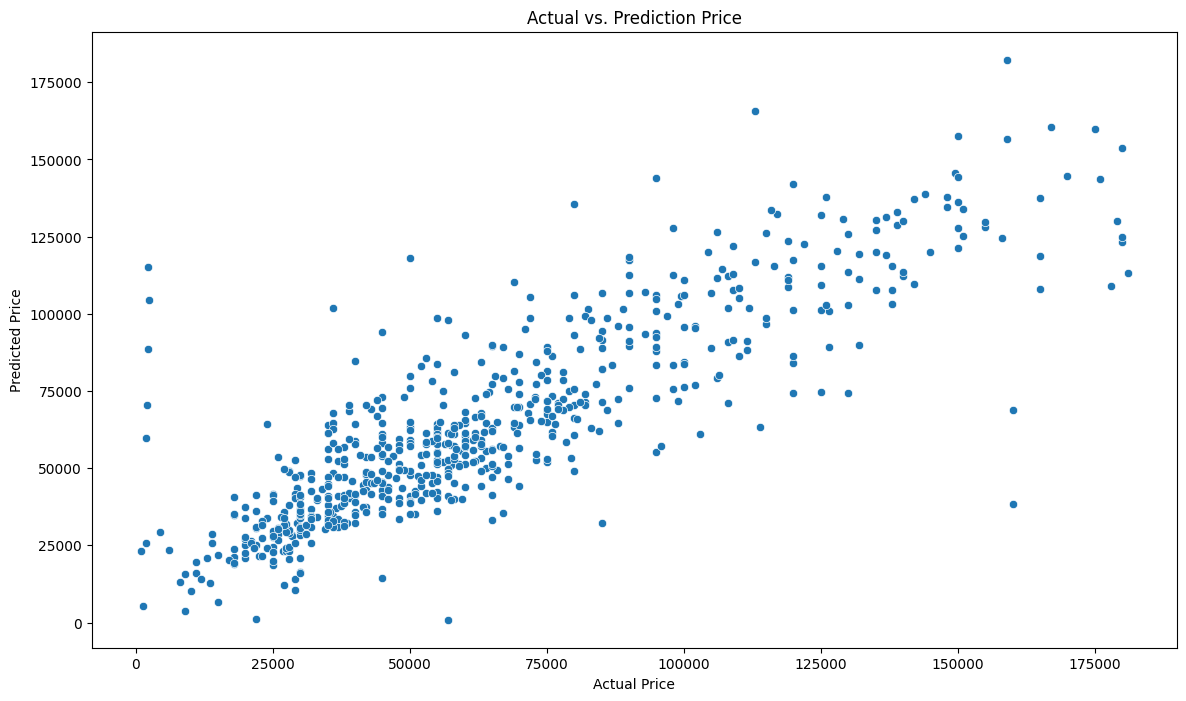

In [119]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Nilai MAPE yang didapat, yaitu sekitar 57% menjadikan model ini belum dapat dikategorikan ke dalam 'reasonable forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

### **Feature Importances**

<AxesSubplot:title={'center':'Feature Importances'}>

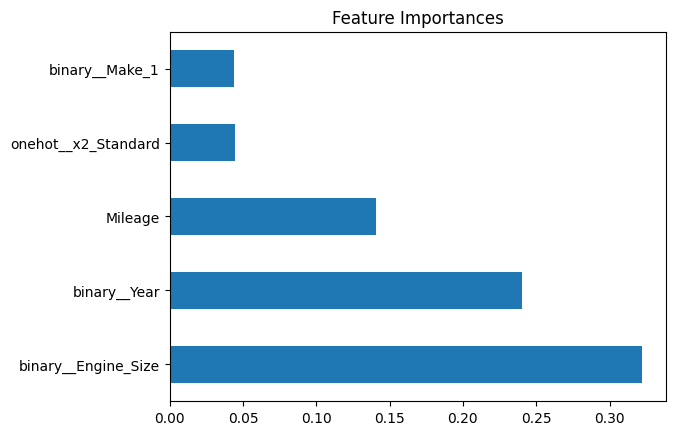

In [ ]:
# Plot feature importances
feature_imp = pd.Series(rfg_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances')

> ## **Conclusion**  <br>

Berdasarkan pemodelan `Machine Learning` yang telah dilakukan, didapatkan beberapa kesimpulan sebagai berikut.
* Fitur numerik seperti `Engine_Size`, `Year` dan `Mileage` tidak memiliki korelasi yang baik dengan target `Price`
* Model yang telah disusun memiliki beberapa batasan dalam rentang target dan fitur numerik yakni:
    * Target `Price`: (1 - 182.000)
    * Fitur `Mileage`: (100 - 433.000)
    * Fitur `Year`: (2003 - 2021)
* Berdasarkan pemodelan yang dilakukan fitur `Engine_Size`, `Year` dan `Mileage` menjadi fitur yang paling berpengaruh terhadap `Price`
* Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~57%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga listing baru di New York City pada rentang nilai seperti yang dilatih terhadap model maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 57% dari harga seharusnya. 
* Model yang dibangun masih memiliki tingkat variasi serta bias yang tinggi. Hal ini dapat disebabkan oleh ketidakberaturan harga penjualan mobil bekas di dalam dataset yang dianalisis.

> ## **Recommendation**  <br>

Terdapat beberapa hal yang dapat dilakukan meninggkatkan reliabilitas model.
1. Perlu dilakukan analisis mengenai variabel yang menyebabkan model menghasilkan error yang tinggi, sehingga dapat dilakukan feature engineering untuk meningkatkan kemampuan model.
1. Perlu dilakukan penambahan fitur yang memiliki korelasi yang baik dengan target `Price` seperti kerusakan pada mobil dan metode pembelian.
1. Penambahan data dapat dicoba untuk menambah kemampuan model.